In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
raw_data = pd.read_csv('metadata_output.csv')
raw_data = raw_data[raw_data["CDR"] != "None"]
for column in raw_data.columns[32:]:
    raw_data = raw_data[raw_data[column] != "None"]

In [100]:
raw_data.describe()

,Age,APOE A1,APOE A2,Study Identifer,Weight,Series Identifer,Slice Thickness,TE,TR,TI,Flip Angle,Matrix X,Matrix Y,Matrix Z,Pixel Spacing X,Pixel Spacing Y,Field Strength
count,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3.194000e+03,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000
mean,75.906527,3.026612,3.486850,9760.629931,74.965534,32754.246086,1.200000e+00,3.748401,1039.672969,827.408579,8.046024,233.948654,234.680025,166.139950,1.049892,1.049892,1.622601
std,6.742940,0.460374,0.506131,5069.883581,14.732009,14627.661360,6.751213e-14,0.289302,1333.352281,371.085212,0.209569,29.836172,30.169886,6.693749,0.145947,0.145947,0.410752
min,55.178100,2.000000,2.000000,1948.000000,0.000000,8723.000000,1.200000e+00,2.840000,6.608000,0.000000,8.000000,192.000000,192.000000,124.000000,0.937500,0.937500,1.494000
25%,71.926000,3.000000,3.000000,5628.750000,64.500000,20798.500000,1.200000e+00,3.590000,8.615200,1000.000000,8.000000,192.000000,192.000000,160.000000,0.937500,0.937500,1.500000
50%,76.152050,3.000000,3.000000,8794.000000,74.390000,31483.000000,1.200000e+00,3.800000,9.120000,1000.000000,8.000000,256.000000,256.000000,166.000000,0.937500,0.937500,1.500000
75%,80.598625,3.000000,4.000000,14017.000000,83.910000,43758.500000,1.200000e+00,3.964000,2400.000000,1000.000000,8.000000,256.000000,256.000000,170.000000,1.250000,1.250000,1.500000
max,91.868500,4.000000,4.000000,66627.000000,139.250000,92584.000000,1.200000e+00,4.960000,3000.000000,1043.000000,9.000000,256.000000,256.000000,184.000000,1.406250,1.406250,3.000000


In [101]:
interest_col = ["SubjectID", "Age", "Sex", "CDR"]
roi_data = raw_data[interest_col]
roi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 0 to 3358
Data columns (total 4 columns):
SubjectID    3194 non-null object
Age          3194 non-null float64
Sex          3194 non-null object
CDR          3194 non-null object
dtypes: float64(1), object(3)
memory usage: 284.8+ KB


In [102]:
roi_data = roi_data.mask(roi_data['CDR'] < '0').dropna()
roi_data = roi_data.assign(Sex=lambda s: s['Sex'].map({'F': 1, 'M': 0}))
roi_data = roi_data.assign(CDR=lambda s: s['CDR'].astype('float'))
roi_data.describe()

,Age,Sex,CDR
count,3181.000000,3181.000000,3181.000000
mean,75.895407,0.419994,0.459604
std,6.743401,0.493635,0.395358
min,55.178100,0.000000,0.000000
25%,71.909600,0.000000,0.000000
50%,76.134200,0.000000,0.500000
75%,80.591800,1.000000,0.500000
max,91.868500,1.000000,3.000000


In [103]:
roi_data['Sex'].value_counts()

0    1845
1    1336
Name: Sex, dtype: int64

In [104]:
Female = roi_data[roi_data['Sex'] == 1]
Male = roi_data[roi_data['Sex'] == 0]

In [122]:
# Female.describe()
# Male.describe()

,Age,Sex,CDR
count,1336.000000,1336.0,1336.000000
mean,75.214213,1.0,0.450225
std,6.926120,0.0,0.430521
min,55.178100,1.0,0.000000
25%,71.583600,1.0,0.000000
50%,75.578050,1.0,0.500000
75%,80.025350,1.0,0.500000
max,91.868500,1.0,2.000000


In [118]:
NC = roi_data[roi_data['CDR'] == 0]
MCI = roi_data[roi_data['CDR'] == 0.5]
AD = roi_data[roi_data['CDR'] >= 1.0]

fNC = Female[Female['CDR'] == 0]
fMCI = Female[Female['CDR'] == 0.5]
fAD = Female[Female['CDR'] >= 1.0]

mNC = Male[Male['CDR'] == 0]
mMCI = Male[Male['CDR'] == 0.5]
mAD = Male[Male['CDR'] >= 1.0]

In [123]:
AD.describe()

,Age,Sex,CDR
count,509.000000,509.000000,509.000000
mean,76.263198,0.481336,1.139489
std,7.446596,0.500143,0.363427
min,55.178100,0.000000,1.000000
25%,71.479500,0.000000,1.000000
50%,76.712300,0.000000,1.000000
75%,81.811000,1.000000,1.000000
max,90.509600,1.000000,3.000000


Text(0, 0.5, '')

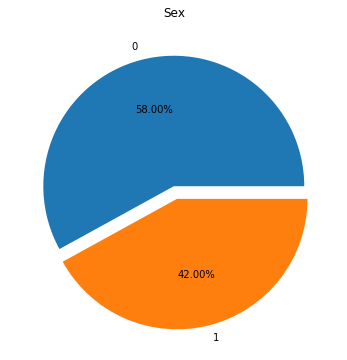

In [133]:
f,ax = plt.subplots(1,1,figsize=(12,6))
roi_data['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%')
ax.set_title('Sex')
ax.set_ylabel('')